In [1]:
import tensorflow as tf
print("GPUs available:", tf.config.list_physical_devices('GPU'))

GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, AveragePooling2D, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
# Define image parameters
img_height, img_width = 128, 128
batch_size = 32


# Define paths to your dataset directories
train_dir = '/Users/milind/Documents/try/Untitled Folder/dataset/Train'      # Replace with your training data directory
validation_dir = '/Users/milind/Documents/try/Untitled Folder/dataset/Test'  # Replace with your validation data directory


# Create ImageDataGenerators for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=40,        # Randomly rotate images   
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Random shear
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest'       # Fill strategy for new pixels
)

# For validation data, only rescaling is applied
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create generators that read images from the directories
train_generator_all = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 22233 images belonging to 14 classes.
Found 7927 images belonging to 14 classes.


### 16+16 2 conv layed 1 max pooling ----- 32+32 and 1 pool ----- 64+64 and 1 pool === fully connected layer 
## kernal = (3,3) and Pooling = (2,2)

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 14)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281,694 (4.89 MB)

 Trainable params: 1,281,694 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 151s 213ms/step - accuracy: 0.2234 - loss: 2.2050 - val_accuracy: 0.5390 - val_loss: 1.1764
Epoch 2/30
  1/694 ━━━━━━━━━━━━━━━━━━━━ 2:12 192ms/step - accuracy: 0.4688 - loss: 1.4554

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


694/694 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.4688 - loss: 1.4554 - val_accuracy: 0.5187 - val_loss: 1.2331
Epoch 3/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 145s 209ms/step - accuracy: 0.5344 - loss: 1.2832 - val_accuracy: 0.6074 - val_loss: 0.9897
Epoch 4/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.5312 - loss: 1.5578 - val_accuracy: 0.6074 - val_loss: 0.9908
Epoch 5/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 145s 209ms/step - accuracy: 0.6329 - loss: 1.0021 - val_accuracy: 0.6955 - val_loss: 0.7932
Epoch 6/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.6562 - loss: 0.9289 - val_accuracy: 0.6990 - val_loss: 0.7858
Epoch 7/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 146s 210ms/step - accuracy: 0.6820 - loss: 0.8646 - val_accuracy: 0.6874 - val_loss: 0.6958
Epoch 8/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.6875 - loss: 0.8558 - val_accuracy: 0.6883 - val_loss: 0.6938
Epoch 9/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 145s 209ms/step - accuracy: 0.7054 - loss: 0.7969 - val

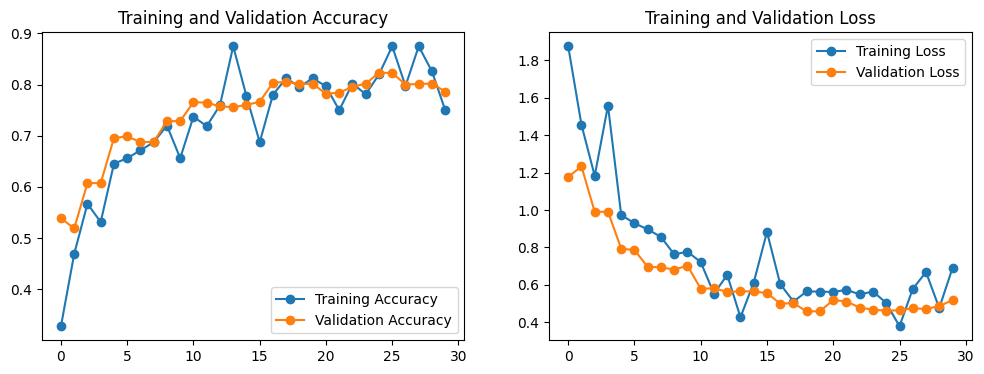

In [12]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

248/248 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.7873 - loss: 0.5114
Test Accuracy: 78.67%
Test loss: 51.91%


<h4 style="color:green">78.67% accuracy fo 30 epochs</h4>

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 14)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281,694 (4.89 MB)

 Trainable params: 1,281,694 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
694/694 ━━━━━━━━━━━━━━━━━━━━ 97s 136ms/step - accuracy: 0.2088 - loss: 2.2577 - val_accuracy: 0.4081 - val_loss: 1.3531
Epoch 2/80
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.3438 - loss: 1.7100 - val_accuracy: 0.4130 - val_loss: 1.3271
Epoch 3/80
694/694 ━━━━━━━━━━━━━━━━━━━━ 94s 136ms/step - accuracy: 0.4952 - loss: 1.3712 - val_accuracy: 0.6457 - val_loss: 0.8901
Epoch 4/80
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.4062 - loss: 1.3147 - val_accuracy: 0.6478 - val_loss: 0.8866
Epoch 5/80
694/694 ━━━━━━━━━━━━━━━━━━━━ 95s 136ms/step - accuracy: 0.6268 - loss: 1.0192 - val_accuracy: 0.6716 - val_loss: 0.8420
Epoch 6/80
694/694 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.7188 - loss: 0.8269 - val_accuracy: 0.6731 - val_loss: 0.8338
Epoch 7/80
694/694 ━━━━━━━━━━━━━━━━━━━━ 91s 131ms/step - accuracy: 0.6882 - loss: 0.8639 - val_accuracy: 0.7171 - val_loss: 0.7300
Epoch 8/80
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.6562 - loss: 0.793

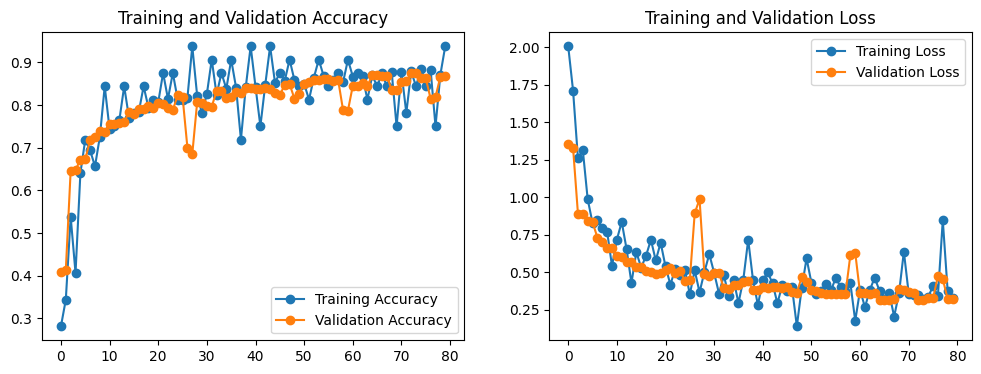

In [16]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=80,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

248/248 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.8581 - loss: 0.3293
Test Accuracy: 86.77%
Test loss: 32.00%


<h4 style="color:green">86.77% accuracy for 80 epochs</h4>

## 1 less layer in FC

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 14)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,265,182 (4.83 MB)

 Trainable params: 1,265,182 (4.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 94s 131ms/step - accuracy: 0.3674 - loss: 1.7762 - val_accuracy: 0.6674 - val_loss: 0.8620
Epoch 2/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.6875 - loss: 0.9758 - val_accuracy: 0.6723 - val_loss: 0.8609
Epoch 3/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 90s 130ms/step - accuracy: 0.6961 - loss: 0.8305 - val_accuracy: 0.7538 - val_loss: 0.6170
Epoch 4/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.7188 - loss: 0.5928 - val_accuracy: 0.7673 - val_loss: 0.5937
Epoch 5/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 89s 128ms/step - accuracy: 0.7582 - loss: 0.6349 - val_accuracy: 0.6991 - val_loss: 0.7677
Epoch 6/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.5312 - loss: 1.0954 - val_accuracy: 0.7313 - val_loss: 0.6683
Epoch 7/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 89s 128ms/step - accuracy: 0.7845 - loss: 0.5658 - val_accuracy: 0.7677 - val_loss: 0.5255
Epoch 8/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.8125 - loss: 0.445

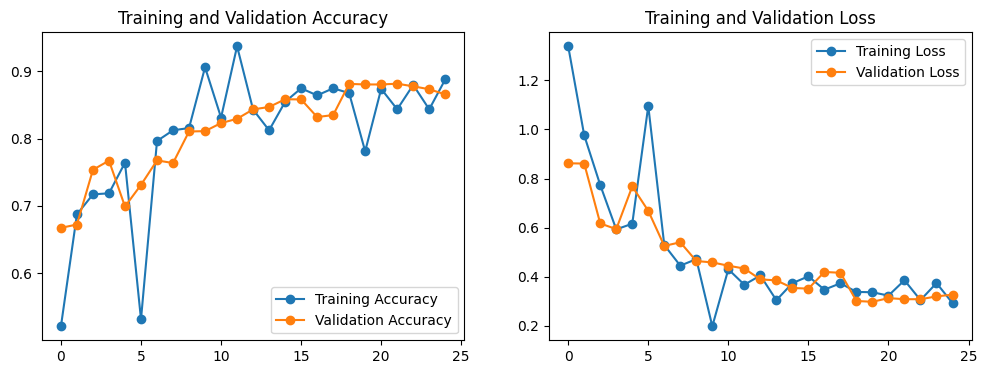

In [26]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dense(64, activation=LeakyReLU(alpha=0.01)),   
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

248/248 ━━━━━━━━━━━━━━━━━━━━ 31s 122ms/step - accuracy: 0.8782 - loss: 0.2979
Test Accuracy: 88.08%
Test loss: 29.74%


<h4 style="color:green">88.08% accuracy for 25 epochs with early stop (patience=5)</h4>

## Trying with less dropout (0.2)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 14)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281,694 (4.89 MB)

 Trainable params: 1,281,694 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 332s 459ms/step - accuracy: 0.2202 - loss: 2.2144 - val_accuracy: 0.5087 - val_loss: 1.3464
Epoch 2/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.5312 - loss: 1.3826 - val_accuracy: 0.5209 - val_loss: 1.3290
Epoch 3/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 339s 487ms/step - accuracy: 0.5051 - loss: 1.3482 - val_accuracy: 0.6304 - val_loss: 0.9600
Epoch 4/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.5312 - loss: 1.3521 - val_accuracy: 0.6039 - val_loss: 1.0539
Epoch 5/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 372s 535ms/step - accuracy: 0.6738 - loss: 0.9114 - val_accuracy: 0.7287 - val_loss: 0.6600
Epoch 6/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 55s 78ms/step - accuracy: 0.6250 - loss: 0.9729 - val_accuracy: 0.7231 - val_loss: 0.6923
Epoch 7/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 286s 411ms/step - accuracy: 0.7255 - loss: 0.7504 - val_accuracy: 0.7238 - val_loss: 0.6318
Epoch 8/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.7500 - loss: 0

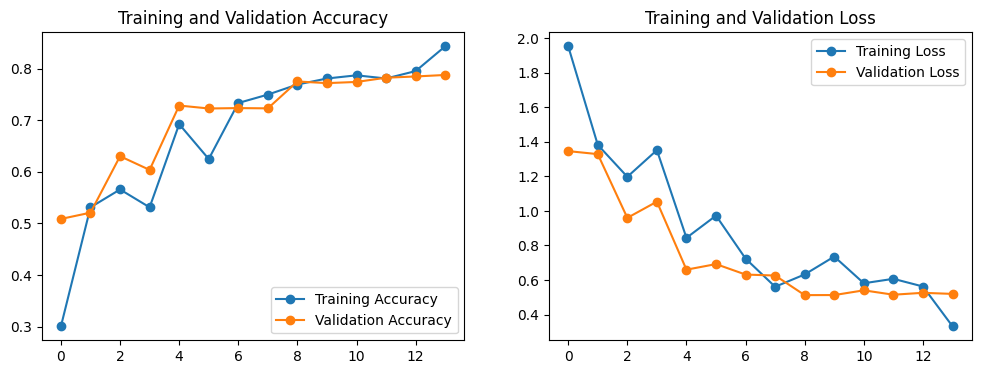

In [45]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.2),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.2),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.2),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.2),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<h4 style="color:green">78.81% accuracy for 14 epochs with early stop (patience=5)</h4>

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 14)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281,694 (4.89 MB)

 Trainable params: 1,281,694 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 239s 336ms/step - accuracy: 0.2721 - loss: 2.0630 - val_accuracy: 0.5053 - val_loss: 1.2403
Epoch 2/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.5000 - loss: 1.4167 - val_accuracy: 0.5168 - val_loss: 1.2052
Epoch 3/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 224s 323ms/step - accuracy: 0.5307 - loss: 1.2467 - val_accuracy: 0.6722 - val_loss: 0.8592
Epoch 4/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.6875 - loss: 0.9140 - val_accuracy: 0.6799 - val_loss: 0.8457
Epoch 5/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 288s 415ms/step - accuracy: 0.6493 - loss: 0.9821 - val_accuracy: 0.7005 - val_loss: 0.7628
Epoch 6/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.7500 - loss: 0.7191 - val_accuracy: 0.6902 - val_loss: 0.7730
Epoch 7/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 242s 349ms/step - accuracy: 0.6962 - loss: 0.8489 - val_accuracy: 0.7415 - val_loss: 0.6459
Epoch 8/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.8438 - loss: 0

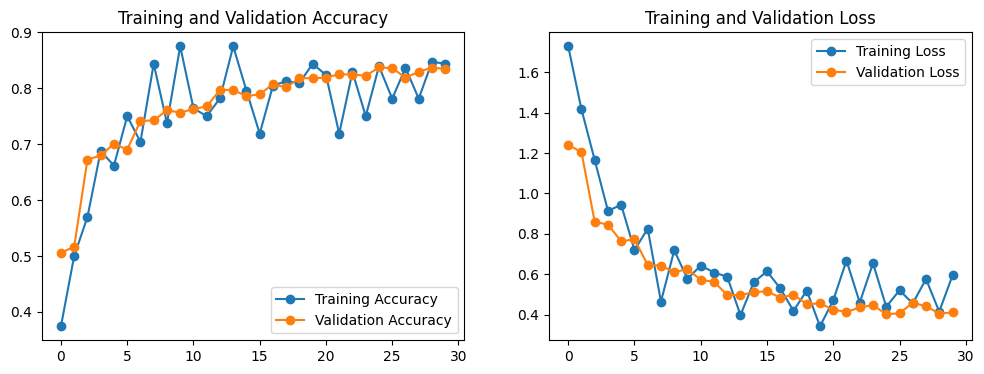

In [47]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.2),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.2),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.2),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.2),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [51]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

248/248 ━━━━━━━━━━━━━━━━━━━━ 33s 133ms/step - accuracy: 0.8392 - loss: 0.3941
Test Accuracy: 83.68%
Test loss: 40.17%


<h4 style="color:green">83.68% accuracy for 30 epochs with early stop (patience=10)</h4>

# Dropout 0.5

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 14)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281,694 (4.89 MB)

 Trainable params: 1,281,694 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 186s 264ms/step - accuracy: 0.1797 - loss: 2.3757 - val_accuracy: 0.2155 - val_loss: 2.1134
Epoch 2/30
  1/694 ━━━━━━━━━━━━━━━━━━━━ 2:02 177ms/step - accuracy: 0.2188 - loss: 2.1821

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


694/694 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.2188 - loss: 2.1821 - val_accuracy: 0.2167 - val_loss: 2.1337
Epoch 3/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 216s 311ms/step - accuracy: 0.2555 - loss: 1.9950 - val_accuracy: 0.3106 - val_loss: 1.7274
Epoch 4/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - accuracy: 0.2500 - loss: 1.8720 - val_accuracy: 0.3101 - val_loss: 1.7394
Epoch 5/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 246s 355ms/step - accuracy: 0.3376 - loss: 1.7901 - val_accuracy: 0.4051 - val_loss: 1.5425
Epoch 6/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.2812 - loss: 1.8881 - val_accuracy: 0.4030 - val_loss: 1.5453
Epoch 7/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 302s 436ms/step - accuracy: 0.4132 - loss: 1.5794 - val_accuracy: 0.4456 - val_loss: 1.4165
Epoch 8/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.4375 - loss: 1.4298 - val_accuracy: 0.4445 - val_loss: 1.4110
Epoch 9/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 175s 252ms/step - accuracy: 0.4904 - loss: 1.4023 - val

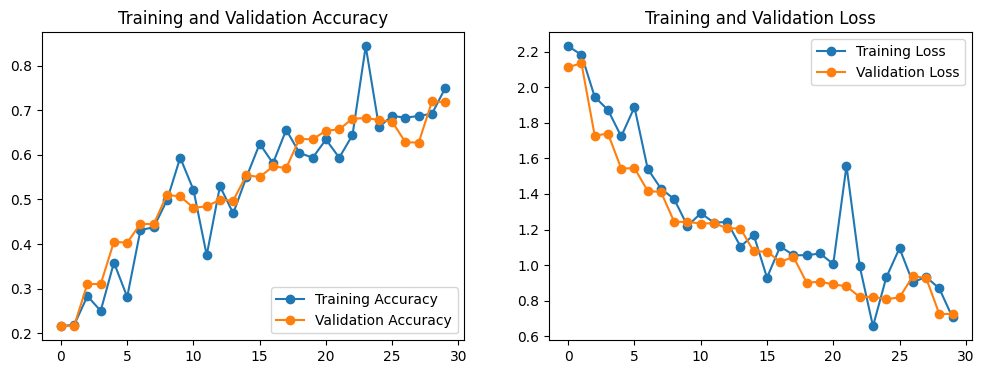

In [36]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    

    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.5),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.5),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.5),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.5),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

248/248 ━━━━━━━━━━━━━━━━━━━━ 33s 133ms/step - accuracy: 0.7872 - loss: 0.4986
Test Accuracy: 71.87%
Test loss: 72.47%


In [38]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

Found 7927 images belonging to 14 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 31s 125ms/step
                precision    recall  f1-score   support

   freshapples       0.93      0.86      0.90       791
   freshbanana       0.98      0.99      0.98       892
 freshcucumber       0.53      0.43      0.48       279
     freshokra       0.40      0.71      0.51       370
  freshoranges       0.80      0.94      0.86       388
   freshpatato       0.50      0.00      0.00       487
    freshtamto       0.77      0.67      0.72       679
  rottenapples       0.81      0.93      0.87       988
  rottenbanana       0.71      0.97      0.82       900
rottencucumber       0.00      0.00      0.00       255
    rottenokra       0.00      0.00      0.00       224
 rottenoranges       0.91      0.60      0.72       403
  rottenpatato       0.42      0.65      0.51       630
   rottentamto       0.65      0.75      0.70       641

      accuracy                           0.72      7927
     macro avg       0.60      0.61      0.58      7927
  

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [39]:
model.save('saved_models/Complete_DR-0.5_30.keras')

# 1 less FC layer

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 14)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,265,182 (4.83 MB)

 Trainable params: 1,265,182 (4.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 105s 149ms/step - accuracy: 0.3484 - loss: 1.8583 - val_accuracy: 0.6660 - val_loss: 0.8377
Epoch 2/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.6250 - loss: 0.7797 - val_accuracy: 0.6786 - val_loss: 0.8122
Epoch 3/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 98s 141ms/step - accuracy: 0.6979 - loss: 0.8013 - val_accuracy: 0.7003 - val_loss: 0.7283
Epoch 4/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.8125 - loss: 0.5357 - val_accuracy: 0.6933 - val_loss: 0.7399
Epoch 5/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 98s 141ms/step - accuracy: 0.7517 - loss: 0.6355 - val_accuracy: 0.7666 - val_loss: 0.5538
Epoch 6/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.8750 - loss: 0.4512 - val_accuracy: 0.7608 - val_loss: 0.5609
Epoch 7/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 97s 139ms/step - accuracy: 0.7950 - loss: 0.5259 - val_accuracy: 0.8257 - val_loss: 0.4351
Epoch 8/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.8750 - loss: 0.23

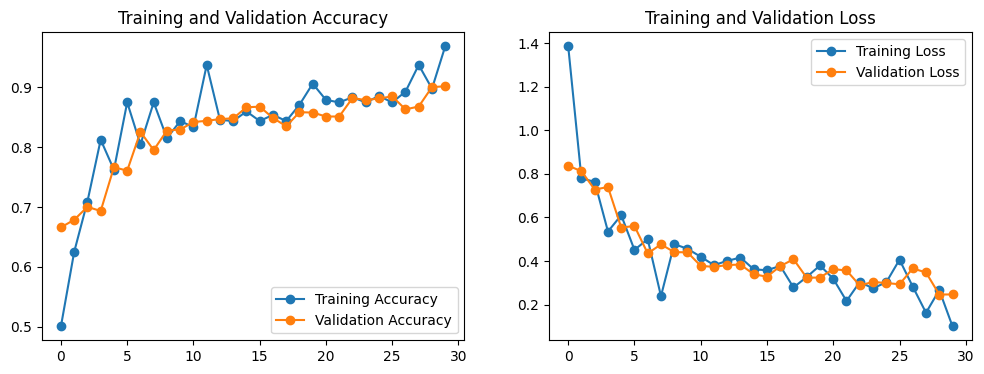

In [20]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dense(64, activation=LeakyReLU(alpha=0.01)),   
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

248/248 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.9031 - loss: 0.2481
Test Accuracy: 90.06%
Test loss: 24.63%


In [22]:
model.save('saved_models/1-Complete_30.keras')

In [20]:
from tensorflow.keras.models import load_model
model=load_model(
    'saved_models/1-Complete_30.keras',
    custom_objects={"LeakyReLU": LeakyReLU},
    compile=False
)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [22]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

248/248 ━━━━━━━━━━━━━━━━━━━━ 38s 151ms/step - accuracy: 0.9273 - loss: 0.1728
Test Accuracy: 90.06%
Test loss: 24.63%


In [21]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

Found 7927 images belonging to 14 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 35s 138ms/step
                precision    recall  f1-score   support

   freshapples       1.00      0.98      0.99       791
   freshbanana       0.99      1.00      0.99       892
 freshcucumber       0.67      0.51      0.58       279
     freshokra       0.68      0.82      0.75       370
  freshoranges       0.98      0.97      0.98       388
   freshpatato       0.93      0.78      0.84       487
    freshtamto       0.84      0.94      0.89       679
  rottenapples       0.98      0.99      0.98       988
  rottenbanana       0.98      1.00      0.99       900
rottencucumber       0.72      0.57      0.64       255
    rottenokra       0.56      0.61      0.58       224
 rottenoranges       0.94      0.98      0.96       403
  rottenpatato       0.84      0.92      0.88       630
   rottentamto       0.89      0.79      0.84       641

      accuracy                           0.90      7927
     macro avg       0.86      0.85      0.85      7927
  

## 30 epochs more

Epoch 1/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 160s 231ms/step - accuracy: 0.9005 - loss: 0.2629 - val_accuracy: 0.8941 - val_loss: 0.2750
Epoch 2/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 1.0000 - loss: 0.0908 - val_accuracy: 0.8916 - val_loss: 0.2798
Epoch 3/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 154s 222ms/step - accuracy: 0.9039 - loss: 0.2564 - val_accuracy: 0.8555 - val_loss: 0.3904
Epoch 4/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.8750 - loss: 0.4235 - val_accuracy: 0.8567 - val_loss: 0.3851
Epoch 5/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 153s 221ms/step - accuracy: 0.9094 - loss: 0.2420 - val_accuracy: 0.8980 - val_loss: 0.2628
Epoch 6/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.9688 - loss: 0.1089 - val_accuracy: 0.8920 - val_loss: 0.2763
Epoch 7/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 155s 224ms/step - accuracy: 0.9137 - loss: 0.2304 - val_accuracy: 0.9179 - val_loss: 0.2068
Epoch 8/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.9375 - loss: 0

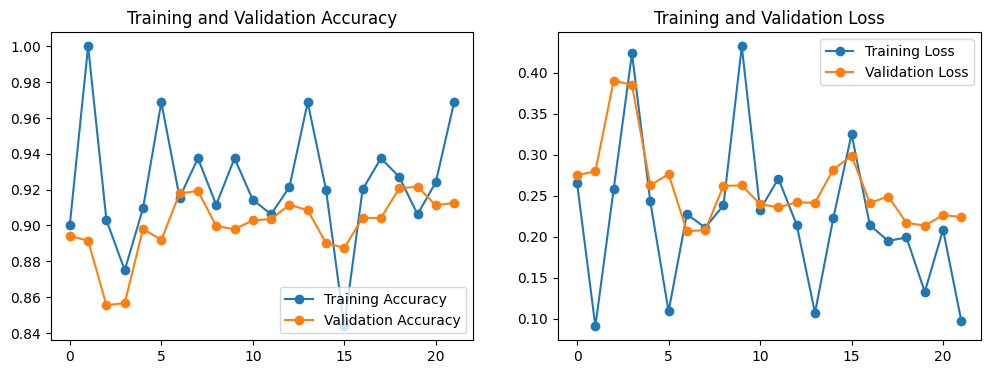

In [24]:
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')g
plt.show()

In [80]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 :.4f}')

248/248 ━━━━━━━━━━━━━━━━━━━━ 31s 126ms/step - accuracy: 0.9467 - loss: 0.1250
Test Accuracy: 91.77%
Test loss: 0.2067


In [26]:
model.save('saved_models/1-Complete_60.keras')

In [34]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

Found 7927 images belonging to 14 classes.
248/248 ━━━━━━━━━━━━━━━━━━━━ 29s 115ms/step
                precision    recall  f1-score   support

   freshapples       0.99      1.00      0.99       791
   freshbanana       1.00      0.99      1.00       892
 freshcucumber       0.84      0.48      0.61       279
     freshokra       0.67      0.88      0.76       370
  freshoranges       0.99      0.99      0.99       388
   freshpatato       0.83      0.94      0.88       487
    freshtamto       0.88      0.96      0.92       679
  rottenapples       0.98      0.99      0.99       988
  rottenbanana       1.00      0.99      0.99       900
rottencucumber       0.80      0.60      0.69       255
    rottenokra       0.58      0.66      0.62       224
 rottenoranges       0.97      0.97      0.97       403
  rottenpatato       0.89      0.88      0.88       630
   rottentamto       0.94      0.84      0.89       641

      accuracy                           0.92      7927
     macro avg 

In [75]:
from tensorflow.keras.models import load_model
model=load_model(
    'saved_models/1-Complete_60.keras',
    custom_objects={"LeakyReLU": LeakyReLU},
    compile=False
)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [52]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

Found 7927 images belonging to 14 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 30s 121ms/step
                precision    recall  f1-score   support

   freshapples       0.99      1.00      0.99       791
   freshbanana       1.00      0.99      1.00       892
 freshcucumber       0.84      0.48      0.61       279
     freshokra       0.67      0.88      0.76       370
  freshoranges       0.99      0.99      0.99       388
   freshpatato       0.83      0.94      0.88       487
    freshtamto       0.88      0.96      0.92       679
  rottenapples       0.98      0.99      0.99       988
  rottenbanana       1.00      0.99      0.99       900
rottencucumber       0.80      0.60      0.69       255
    rottenokra       0.58      0.66      0.62       224
 rottenoranges       0.97      0.97      0.97       403
  rottenpatato       0.89      0.88      0.88       630
   rottentamto       0.94      0.84      0.89       641

      accuracy                           0.92      7927
     macro avg       0.88      0.87      0.87      7927
  

Found 7927 images belonging to 14 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 31s 123ms/step


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

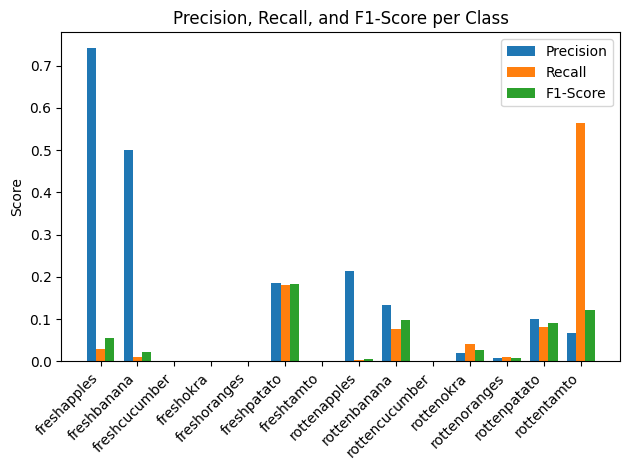

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

validation_generator_all = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input
).flow_from_directory(
    'dataset/Test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)    

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

target_names = list(validation_generator_all.class_indices.keys())

report = classification_report(
    y_true, 
    y_pred_classes, 
    target_names=target_names, 
    output_dict=True
)

# --- Extract metrics ---
precision = [report[c]['precision'] for c in target_names]
recall    = [report[c]['recall']    for c in target_names]
f1        = [report[c]['f1-score']  for c in target_names]

# --- Plot grouped bar chart ---
x = np.arange(len(target_names))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, precision, width, label='Precision')
ax.bar(x,       recall,    width, label='Recall')
ax.bar(x + width, f1,      width, label='F1-Score')

ax.set_xticks(x)
ax.set_xticklabels(target_names, rotation=45, ha='right')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score per Class')
ax.legend()

plt.tight_layout()
plt.show()


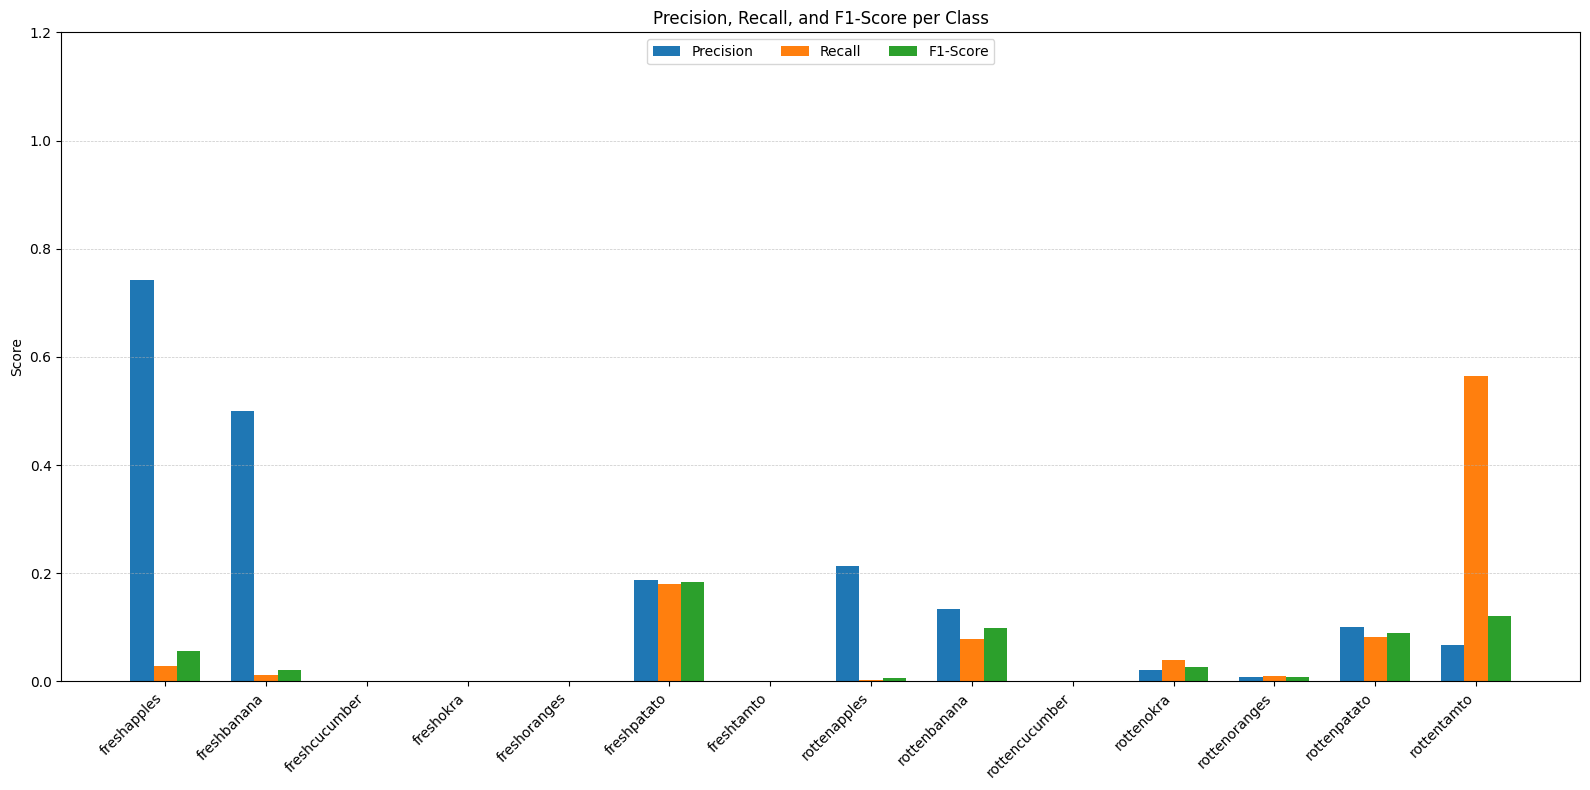

In [50]:
n_groups      = len(target_names)
bar_width     = 0.45
group_padding = 0.6    # gap between one group’s last bar and the next group’s first bar

# Compute x‑coordinates for group centers:
group_centers = np.arange(n_groups) * (3*bar_width + group_padding)

# Offsets for the three bars within each group:
offsets = [-bar_width, 0, +bar_width]

# Plot
fig, ax = plt.subplots(figsize=(16, 8))
for offset, data, label in zip(offsets, [precision, recall, f1], ['Precision','Recall','F1‑Score']):
    ax.bar(group_centers + offset, data, bar_width, label=label)

# Styling
ax.set_xticks(group_centers)
ax.set_xticklabels(target_names, rotation=45, ha='right')
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_ylim(0, 1.2)
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1‑Score per Class')
ax.legend(loc='upper center', ncol=3)
plt.tight_layout()
plt.show()

### 30 more epochs

Epoch 1/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 237s 337ms/step - accuracy: 0.9158 - loss: 0.2302 - val_accuracy: 0.9003 - val_loss: 0.2600
Epoch 2/30
  1/694 ━━━━━━━━━━━━━━━━━━━━ 4:34 397ms/step - accuracy: 0.8438 - loss: 0.3457

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


694/694 ━━━━━━━━━━━━━━━━━━━━ 36s 52ms/step - accuracy: 0.8438 - loss: 0.3457 - val_accuracy: 0.9007 - val_loss: 0.2584
Epoch 3/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 383s 552ms/step - accuracy: 0.9139 - loss: 0.2308 - val_accuracy: 0.9186 - val_loss: 0.2247
Epoch 4/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 46s 65ms/step - accuracy: 0.9062 - loss: 0.1901 - val_accuracy: 0.9150 - val_loss: 0.2383
Epoch 5/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 318s 457ms/step - accuracy: 0.9164 - loss: 0.2263 - val_accuracy: 0.9011 - val_loss: 0.2718
Epoch 6/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 48s 69ms/step - accuracy: 1.0000 - loss: 0.0727 - val_accuracy: 0.9014 - val_loss: 0.2726
Epoch 7/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 316s 454ms/step - accuracy: 0.9237 - loss: 0.2079 - val_accuracy: 0.8926 - val_loss: 0.2667
Epoch 8/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.8750 - loss: 0.2571 - val_accuracy: 0.8942 - val_loss: 0.2646
Epoch 9/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 317s 456ms/step - accuracy: 0.9295 - loss: 0.1937 - val

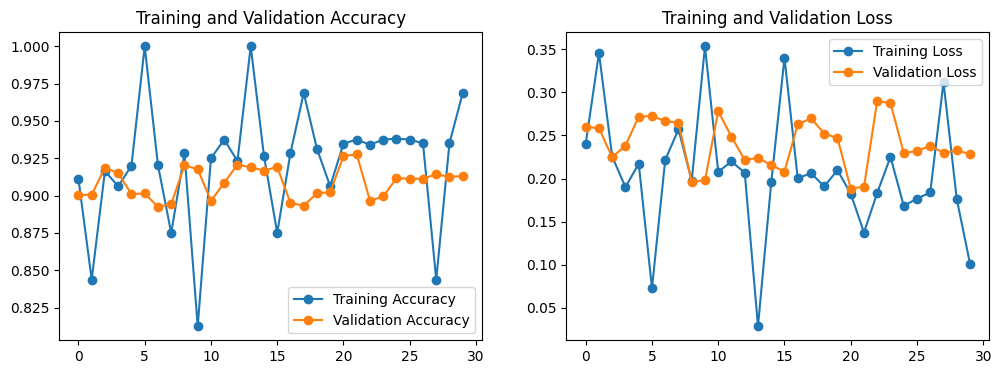

In [82]:
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [84]:
model.save('saved_models/1-Complete_90.keras')

In [91]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1:.4f}')

248/248 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - accuracy: 0.9590 - loss: 0.0983
Test Accuracy: 92.61%
Test loss: 0.1894


In [86]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

Found 7927 images belonging to 14 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 28s 112ms/step
                precision    recall  f1-score   support

   freshapples       0.99      0.99      0.99       791
   freshbanana       1.00      1.00      1.00       892
 freshcucumber       0.81      0.57      0.67       279
     freshokra       0.66      0.93      0.77       370
  freshoranges       0.96      1.00      0.98       388
   freshpatato       0.87      0.95      0.91       487
    freshtamto       0.86      0.98      0.92       679
  rottenapples       0.99      1.00      0.99       988
  rottenbanana       1.00      1.00      1.00       900
rottencucumber       0.86      0.60      0.71       255
    rottenokra       0.69      0.70      0.69       224
 rottenoranges       0.98      0.95      0.97       403
  rottenpatato       0.92      0.90      0.91       630
   rottentamto       0.97      0.78      0.87       641

      accuracy                           0.93      7927
     macro avg       0.90      0.88      0.88      7927
  

## 30 more epoch

Epoch 1/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 160s 231ms/step - accuracy: 0.9301 - loss: 0.1970 - val_accuracy: 0.9056 - val_loss: 0.2579
Epoch 2/30
  1/694 ━━━━━━━━━━━━━━━━━━━━ 1:24 121ms/step - accuracy: 0.9062 - loss: 0.1636

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


694/694 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.9062 - loss: 0.1636 - val_accuracy: 0.9098 - val_loss: 0.2519
Epoch 3/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 153s 220ms/step - accuracy: 0.9370 - loss: 0.1678 - val_accuracy: 0.9095 - val_loss: 0.2354
Epoch 4/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.8750 - loss: 0.1375 - val_accuracy: 0.9095 - val_loss: 0.2339
Epoch 5/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 152s 219ms/step - accuracy: 0.9324 - loss: 0.1869 - val_accuracy: 0.9133 - val_loss: 0.2314
Epoch 6/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9688 - loss: 0.1191 - val_accuracy: 0.9152 - val_loss: 0.2260
Epoch 7/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 152s 220ms/step - accuracy: 0.9404 - loss: 0.1737 - val_accuracy: 0.9003 - val_loss: 0.2713
Epoch 8/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9062 - loss: 0.3009 - val_accuracy: 0.8970 - val_loss: 0.2687
Epoch 9/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 1326s 2s/step - accuracy: 0.9409 - loss: 0.1638 - val_a

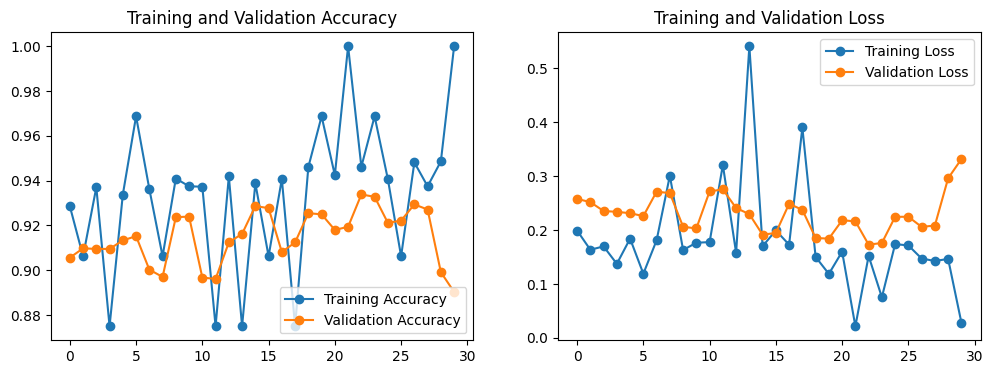

In [94]:
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [95]:
model.save('saved_models/1-Complete_120.keras')

In [96]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1:.4f}')

248/248 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9640 - loss: 0.0880
Test Accuracy: 93.36%
Test loss: 0.1739


In [97]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

Found 7927 images belonging to 14 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step
                precision    recall  f1-score   support

   freshapples       1.00      1.00      1.00       791
   freshbanana       1.00      1.00      1.00       892
 freshcucumber       0.79      0.67      0.72       279
     freshokra       0.77      0.89      0.83       370
  freshoranges       0.99      0.99      0.99       388
   freshpatato       0.91      0.94      0.93       487
    freshtamto       0.84      0.98      0.90       679
  rottenapples       0.99      1.00      1.00       988
  rottenbanana       0.99      1.00      0.99       900
rottencucumber       0.81      0.67      0.73       255
    rottenokra       0.70      0.82      0.76       224
 rottenoranges       0.99      0.99      0.99       403
  rottenpatato       0.93      0.92      0.93       630
   rottentamto       0.97      0.74      0.84       641

      accuracy                           0.93      7927
     macro avg       0.91      0.90      0.90      7927
  w

## 30 more epoch

In [14]:
from tensorflow.keras.models import load_model
model=load_model(
    'saved_models/1-Complete_120.keras',
    custom_objects={"LeakyReLU": LeakyReLU},
    compile=False
)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

2025-05-04 16:20:36.310852: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-05-04 16:20:36.312817: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-05-04 16:20:36.312830: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1746355836.313513 43371214 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1746355836.314090 43371214 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


2025-05-04 16:22:12.671876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


694/694 ━━━━━━━━━━━━━━━━━━━━ 174s 242ms/step - accuracy: 0.9434 - loss: 0.1610 - val_accuracy: 0.9247 - val_loss: 0.2046
Epoch 2/30
  1/694 ━━━━━━━━━━━━━━━━━━━━ 1:31 132ms/step - accuracy: 0.9688 - loss: 0.0454

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


694/694 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.9688 - loss: 0.0454 - val_accuracy: 0.9228 - val_loss: 0.2094
Epoch 3/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 211s 304ms/step - accuracy: 0.9494 - loss: 0.1436 - val_accuracy: 0.9031 - val_loss: 0.2864
Epoch 4/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.8438 - loss: 0.2591 - val_accuracy: 0.9044 - val_loss: 0.2774
Epoch 5/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 200s 287ms/step - accuracy: 0.9500 - loss: 0.1424 - val_accuracy: 0.9202 - val_loss: 0.2289
Epoch 6/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.9375 - loss: 0.1417 - val_accuracy: 0.9204 - val_loss: 0.2263
Epoch 7/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 208s 298ms/step - accuracy: 0.9530 - loss: 0.1303 - val_accuracy: 0.9264 - val_loss: 0.2218
Epoch 8/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.9688 - loss: 0.0746 - val_accuracy: 0.9216 - val_loss: 0.2304
Epoch 9/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 230s 331ms/step - accuracy: 0.9498 - loss: 0.1459 - val

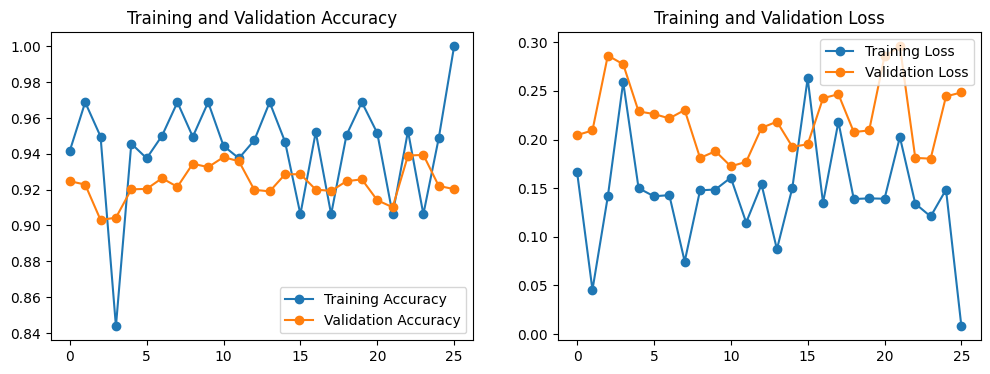

In [20]:
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
model.save('saved_models/1-Complete_146.keras')

In [24]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1:.4f}')

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

248/248 ━━━━━━━━━━━━━━━━━━━━ 30s 117ms/step - accuracy: 0.9370 - loss: 0.1747
Test Accuracy: 93.81%
Test loss: 0.1724
Found 7927 images belonging to 14 classes.
248/248 ━━━━━━━━━━━━━━━━━━━━ 28s 114ms/step
                precision    recall  f1-score   support

   freshapples       1.00      0.99      1.00       791
   freshbanana       1.00      0.99      1.00       892
 freshcucumber       0.87      0.71      0.78       279
     freshokra       0.79      0.93      0.85       370
  freshoranges       1.00      1.00      1.00       388
   freshpatato       0.87      0.94      0.90       487
    freshtamto       0.86      1.00      0.92       679
  rottenapples       0.99      1.00      1.00       988
  rottenbanana       1.00      1.00      1.00       900
rottencucumber       0.84      0.62      0.71       255
    rottenokra       0.71      0.80      0.75       224
 rottenoranges       1.00      1.00      1.00       403
  rottenpatato       0.97      0.86      0.91       630
   rottent

In [25]:
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=4,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/4
694/694 ━━━━━━━━━━━━━━━━━━━━ 170s 243ms/step - accuracy: 0.9493 - loss: 0.1455 - val_accuracy: 0.9230 - val_loss: 0.2140
Epoch 2/4
  1/694 ━━━━━━━━━━━━━━━━━━━━ 3:39 316ms/step - accuracy: 1.0000 - loss: 0.0855

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


694/694 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 1.0000 - loss: 0.0855 - val_accuracy: 0.9230 - val_loss: 0.2119
Epoch 3/4
694/694 ━━━━━━━━━━━━━━━━━━━━ 183s 264ms/step - accuracy: 0.9514 - loss: 0.1416 - val_accuracy: 0.9141 - val_loss: 0.2655
Epoch 4/4
694/694 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.9375 - loss: 0.1293 - val_accuracy: 0.9124 - val_loss: 0.2698


In [26]:
model.save('saved_models/1-Complete_150.keras')

In [31]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1:.4f}')

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

248/248 ━━━━━━━━━━━━━━━━━━━━ 30s 122ms/step - accuracy: 0.9647 - loss: 0.0914
Test Accuracy: 94.94%
Test loss: 0.1376
Found 7927 images belonging to 14 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 29s 118ms/step
                precision    recall  f1-score   support

   freshapples       1.00      1.00      1.00       791
   freshbanana       1.00      1.00      1.00       892
 freshcucumber       0.94      0.59      0.72       279
     freshokra       0.80      0.92      0.85       370
  freshoranges       0.99      1.00      1.00       388
   freshpatato       0.95      0.95      0.95       487
    freshtamto       0.88      0.99      0.93       679
  rottenapples       0.99      1.00      0.99       988
  rottenbanana       1.00      1.00      1.00       900
rottencucumber       0.77      0.85      0.80       255
    rottenokra       0.75      0.86      0.80       224
 rottenoranges       1.00      1.00      1.00       403
  rottenpatato       0.95      0.94      0.94       630
   rottentamto       0.98      0.84      0.91       641

      accuracy                           0.95      7927
     macro avg       0.93      0.92      0.92      7927
  

## 180 epochs

Epoch 1/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 196s 283ms/step - accuracy: 0.9541 - loss: 0.1352 - val_accuracy: 0.9269 - val_loss: 0.2189
Epoch 2/30
  1/694 ━━━━━━━━━━━━━━━━━━━━ 2:21 205ms/step - accuracy: 0.9688 - loss: 0.1483

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


694/694 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.9688 - loss: 0.1483 - val_accuracy: 0.9256 - val_loss: 0.2203
Epoch 3/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 180s 259ms/step - accuracy: 0.9580 - loss: 0.1214 - val_accuracy: 0.9257 - val_loss: 0.2321
Epoch 4/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.9375 - loss: 0.1826 - val_accuracy: 0.9231 - val_loss: 0.2355
Epoch 5/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 238s 343ms/step - accuracy: 0.9559 - loss: 0.1264 - val_accuracy: 0.9310 - val_loss: 0.1909
Epoch 6/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.9062 - loss: 0.1732 - val_accuracy: 0.9309 - val_loss: 0.1923
Epoch 7/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 189s 273ms/step - accuracy: 0.9512 - loss: 0.1449 - val_accuracy: 0.9316 - val_loss: 0.2201
Epoch 8/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.9688 - loss: 0.0655 - val_accuracy: 0.9327 - val_loss: 0.2147
Epoch 9/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 165s 238ms/step - accuracy: 0.9553 - loss: 0.1282 - val

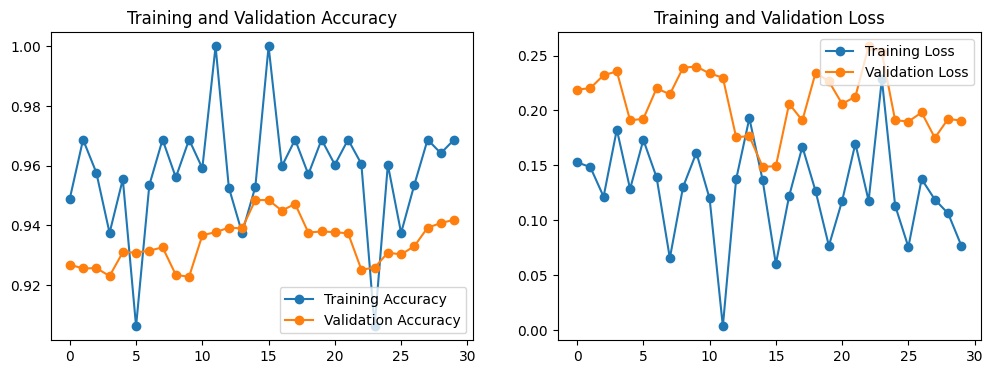

In [33]:
# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=20, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
model.save('saved_models/1-Complete_180.keras')

In [35]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1:.4f}')

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

248/248 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.9663 - loss: 0.0965
Test Accuracy: 94.85%
Test loss: 0.1484
Found 7927 images belonging to 14 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step
                precision    recall  f1-score   support

   freshapples       1.00      0.99      0.99       791
   freshbanana       1.00      1.00      1.00       892
 freshcucumber       0.89      0.79      0.83       279
     freshokra       0.81      0.91      0.86       370
  freshoranges       1.00      0.99      0.99       388
   freshpatato       0.98      0.89      0.93       487
    freshtamto       0.86      0.98      0.91       679
  rottenapples       0.99      1.00      0.99       988
  rottenbanana       1.00      0.99      0.99       900
rottencucumber       0.92      0.81      0.86       255
    rottenokra       0.79      0.87      0.82       224
 rottenoranges       0.99      1.00      0.99       403
  rottenpatato       0.90      0.98      0.94       630
   rottentamto       0.96      0.80      0.88       641

      accuracy                           0.95      7927
     macro avg       0.93      0.93      0.93      7927
  w

## 210 epochs

Epoch 1/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 111s 158ms/step - accuracy: 0.9591 - loss: 0.1230 - val_accuracy: 0.9412 - val_loss: 0.1782
Epoch 2/30
  1/694 ━━━━━━━━━━━━━━━━━━━━ 3:54 338ms/step - accuracy: 1.0000 - loss: 0.0765

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


694/694 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 1.0000 - loss: 0.0765 - val_accuracy: 0.9408 - val_loss: 0.1824
Epoch 3/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 120s 173ms/step - accuracy: 0.9550 - loss: 0.1296 - val_accuracy: 0.9564 - val_loss: 0.1218
Epoch 4/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9375 - loss: 0.1826 - val_accuracy: 0.9561 - val_loss: 0.1209
Epoch 5/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 137s 198ms/step - accuracy: 0.9574 - loss: 0.1232 - val_accuracy: 0.9341 - val_loss: 0.1910
Epoch 6/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 1.0000 - loss: 0.0292 - val_accuracy: 0.9374 - val_loss: 0.1830
Epoch 7/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 118s 170ms/step - accuracy: 0.9597 - loss: 0.1137 - val_accuracy: 0.9405 - val_loss: 0.1598
Epoch 8/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9062 - loss: 0.2333 - val_accuracy: 0.9421 - val_loss: 0.1546
Epoch 9/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 119s 172ms/step - accuracy: 0.9568 - loss: 0.1267 - val

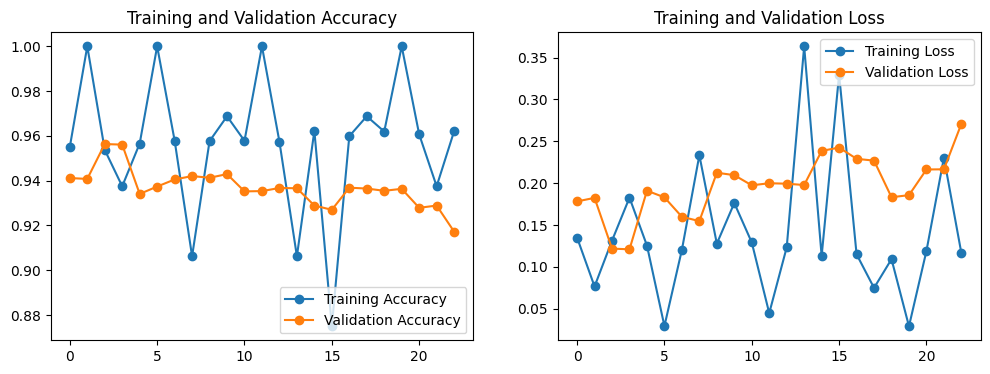

In [45]:
# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=20, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
model.save('saved_models/1-Complete_203.keras')

In [47]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1:.4f}')

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

248/248 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.9768 - loss: 0.0707
Test Accuracy: 95.65%
Test loss: 0.1215
Found 7927 images belonging to 14 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step
                precision    recall  f1-score   support

   freshapples       1.00      1.00      1.00       791
   freshbanana       1.00      1.00      1.00       892
 freshcucumber       0.91      0.84      0.87       279
     freshokra       0.87      0.88      0.87       370
  freshoranges       0.99      1.00      1.00       388
   freshpatato       0.93      0.97      0.95       487
    freshtamto       0.87      0.98      0.92       679
  rottenapples       1.00      1.00      1.00       988
  rottenbanana       1.00      1.00      1.00       900
rottencucumber       0.86      0.87      0.86       255
    rottenokra       0.79      0.82      0.80       224
 rottenoranges       1.00      0.99      0.99       403
  rottenpatato       0.95      0.95      0.95       630
   rottentamto       0.97      0.82      0.89       641

      accuracy                           0.96      7927
     macro avg       0.94      0.94      0.94      7927
  w

In [7]:
from tensorflow.keras.models import load_model
model=load_model(
    'saved_models/1-Complete_203.keras',
    custom_objects={"LeakyReLU": LeakyReLU},
    compile=False
)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

2025-05-04 22:37:55.053240: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-05-04 22:37:55.053432: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-05-04 22:37:55.053441: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1746378475.054286 44104394 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1746378475.055145 44104394 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7


2025-05-04 22:38:37.267948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


694/694 ━━━━━━━━━━━━━━━━━━━━ 209s 297ms/step - accuracy: 0.9555 - loss: 0.1368 - val_accuracy: 0.9455 - val_loss: 0.1939
Epoch 2/7
  1/694 ━━━━━━━━━━━━━━━━━━━━ 2:38 228ms/step - accuracy: 0.9688 - loss: 0.1755

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


694/694 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.9688 - loss: 0.1755 - val_accuracy: 0.9456 - val_loss: 0.1891
Epoch 3/7
694/694 ━━━━━━━━━━━━━━━━━━━━ 175s 252ms/step - accuracy: 0.9620 - loss: 0.1179 - val_accuracy: 0.9207 - val_loss: 0.2291
Epoch 4/7
694/694 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.8750 - loss: 0.1817 - val_accuracy: 0.9200 - val_loss: 0.2361
Epoch 5/7
694/694 ━━━━━━━━━━━━━━━━━━━━ 183s 264ms/step - accuracy: 0.9579 - loss: 0.1200 - val_accuracy: 0.9489 - val_loss: 0.1627
Epoch 6/7
694/694 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.9688 - loss: 0.0658 - val_accuracy: 0.9486 - val_loss: 0.1626
Epoch 7/7
694/694 ━━━━━━━━━━━━━━━━━━━━ 234s 337ms/step - accuracy: 0.9643 - loss: 0.1029 - val_accuracy: 0.9298 - val_loss: 0.2346


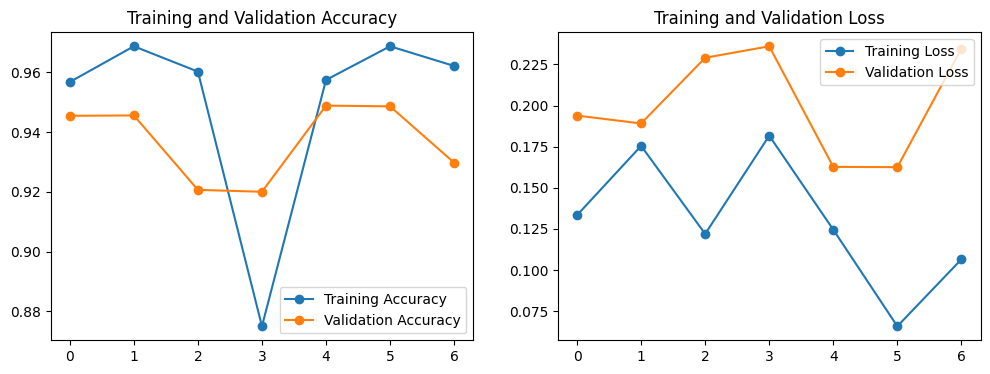

In [9]:
# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=25, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=7,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
model.save('saved_models/1-Complete_210.keras')

In [12]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1:.4f}')

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

248/248 ━━━━━━━━━━━━━━━━━━━━ 29s 118ms/step - accuracy: 0.9461 - loss: 0.1666
Test Accuracy: 94.89%
Test loss: 0.1626
Found 7927 images belonging to 14 classes.
248/248 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step
                precision    recall  f1-score   support

   freshapples       0.99      0.99      0.99       791
   freshbanana       1.00      1.00      1.00       892
 freshcucumber       0.90      0.84      0.87       279
     freshokra       0.85      0.94      0.89       370
  freshoranges       0.99      0.99      0.99       388
   freshpatato       0.96      0.93      0.94       487
    freshtamto       0.85      0.98      0.91       679
  rottenapples       0.99      0.98      0.99       988
  rottenbanana       1.00      1.00      1.00       900
rottencucumber       0.87      0.79      0.83       255
    rottenokra       0.74      0.88      0.80       224
 rottenoranges       0.96      0.99      0.97       403
  rottenpatato       0.95      0.96      0.95       630
   rottent

## 240 epochs

Epoch 1/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 232s 335ms/step - accuracy: 0.9580 - loss: 0.1262 - val_accuracy: 0.9236 - val_loss: 0.2865
Epoch 2/30
  1/694 ━━━━━━━━━━━━━━━━━━━━ 1:49 158ms/step - accuracy: 0.9062 - loss: 0.1650

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


694/694 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.9062 - loss: 0.1650 - val_accuracy: 0.9238 - val_loss: 0.2902
Epoch 3/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 192s 277ms/step - accuracy: 0.9603 - loss: 0.1173 - val_accuracy: 0.9367 - val_loss: 0.1860
Epoch 4/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.9688 - loss: 0.0865 - val_accuracy: 0.9372 - val_loss: 0.1809
Epoch 5/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 231s 333ms/step - accuracy: 0.9547 - loss: 0.1395 - val_accuracy: 0.9243 - val_loss: 0.2552
Epoch 6/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.9688 - loss: 0.1048 - val_accuracy: 0.9240 - val_loss: 0.2518
Epoch 7/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 229s 330ms/step - accuracy: 0.9605 - loss: 0.1172 - val_accuracy: 0.9348 - val_loss: 0.2076
Epoch 8/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 1.0000 - loss: 0.0405 - val_accuracy: 0.9393 - val_loss: 0.1907
Epoch 9/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 228s 329ms/step - accuracy: 0.9621 - loss: 0.1130 - val

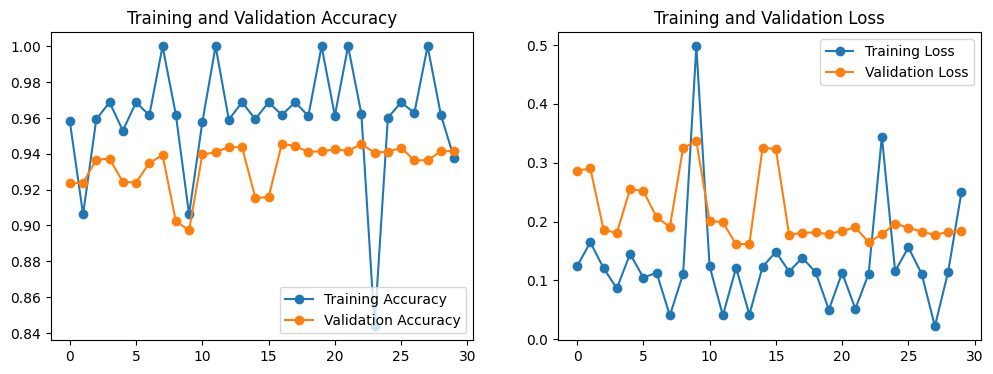

In [13]:
# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=25, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
model.save('saved_models/1-Complete_240.keras')

In [16]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1:.4f}')

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

248/248 ━━━━━━━━━━━━━━━━━━━━ 37s 149ms/step - accuracy: 0.9755 - loss: 0.0718
Test Accuracy: 94.37%
Test loss: 0.1621
Found 7927 images belonging to 14 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 61s 246ms/step
                precision    recall  f1-score   support

   freshapples       1.00      1.00      1.00       791
   freshbanana       1.00      1.00      1.00       892
 freshcucumber       0.88      0.91      0.89       279
     freshokra       0.93      0.83      0.88       370
  freshoranges       0.99      1.00      0.99       388
   freshpatato       0.94      0.95      0.94       487
    freshtamto       0.81      0.99      0.89       679
  rottenapples       0.99      1.00      0.99       988
  rottenbanana       1.00      1.00      1.00       900
rottencucumber       0.80      0.87      0.83       255
    rottenokra       0.74      0.84      0.79       224
 rottenoranges       0.99      0.99      0.99       403
  rottenpatato       0.92      0.94      0.93       630
   rottentamto       0.98      0.68      0.81       641

      accuracy                           0.94      7927
     macro avg       0.93      0.93      0.92      7927
  

In [33]:
from tensorflow.keras.models import load_model
model=load_model(
    'saved_models/1-Complete_203.keras',
    custom_objects={"LeakyReLU": LeakyReLU},
    compile=False
)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [35]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1:.4f}')

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

248/248 ━━━━━━━━━━━━━━━━━━━━ 33s 131ms/step - accuracy: 0.9768 - loss: 0.0707
Test Accuracy: 95.65%
Test loss: 0.1215
Found 7927 images belonging to 14 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 32s 129ms/step
                precision    recall  f1-score   support

   freshapples       1.00      1.00      1.00       791
   freshbanana       1.00      1.00      1.00       892
 freshcucumber       0.91      0.84      0.87       279
     freshokra       0.87      0.88      0.87       370
  freshoranges       0.99      1.00      1.00       388
   freshpatato       0.93      0.97      0.95       487
    freshtamto       0.87      0.98      0.92       679
  rottenapples       1.00      1.00      1.00       988
  rottenbanana       1.00      1.00      1.00       900
rottencucumber       0.86      0.87      0.86       255
    rottenokra       0.79      0.82      0.80       224
 rottenoranges       1.00      0.99      0.99       403
  rottenpatato       0.95      0.95      0.95       630
   rottentamto       0.97      0.82      0.89       641

      accuracy                           0.96      7927
     macro avg       0.94      0.94      0.94      7927
  

248/248 ━━━━━━━━━━━━━━━━━━━━ 29s 116ms/step


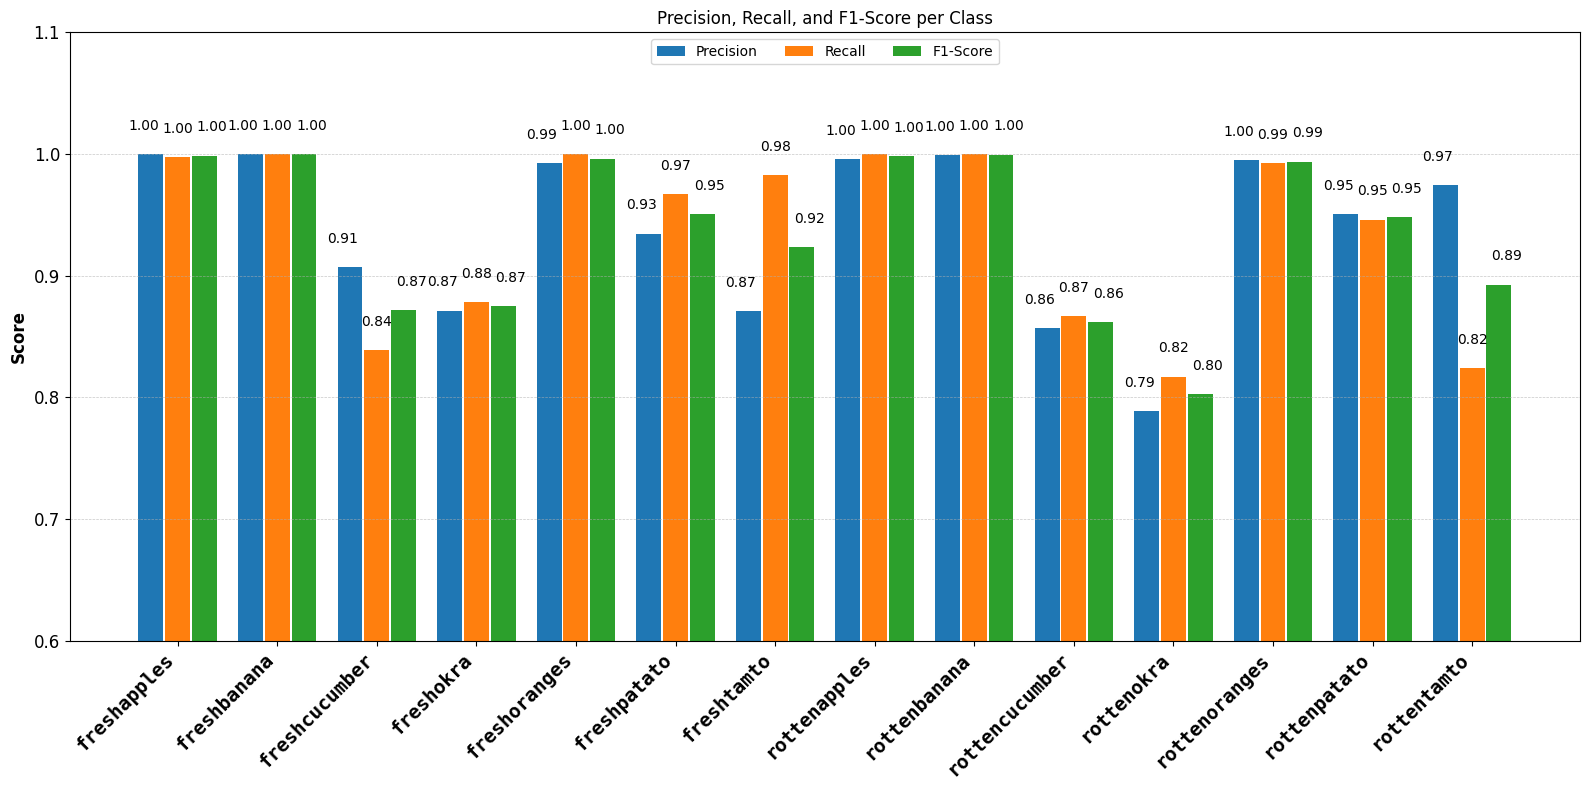

In [39]:
# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

target_names = list(validation_generator_all.class_indices.keys())

report = classification_report(
    y_true, 
    y_pred_classes, 
    target_names=target_names, 
    output_dict=True
)

# --- Extract metrics ---
precision = [report[c]['precision'] for c in target_names]
recall    = [report[c]['recall']    for c in target_names]
f1        = [report[c]['f1-score']  for c in target_names]

# --- Plot setup ---
# Set font properties
font_properties = {
    'fontsize': 14,        # Adjust size here (try 10–14)
    'fontweight': 'bold',  # Try 'normal', 'bold', or 'light'
    'fontfamily': 'monospace'  # Try 'serif', 'sans-serif', 'monospace', etc.
}
spacing_factor = 1.6           # try values >1.0 for more gap
x = np.arange(len(target_names)) * spacing_factor
x1 = np.arange(len(target_names))

width = 0.4

fig, ax = plt.subplots(figsize=(16, 8))         # wider figure
ax.bar(x - width - 0.03, precision, width, label='Precision')
ax.bar(x ,       recall,    width, label='Recall')
ax.bar(x + width + 0.03, f1,      width, label='F1-Score')

# --- Background grid lines on y-axis ---
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# --- Labels, ticks, legend ---
ax.set_xticks(x)
ax.set_xticklabels(target_names, rotation=45, ha='right',**font_properties)
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
# Customize y-axis tick labels
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim(0.6, 1.1)  # ensure space above 1.0 for annotations
ax.set_title('Precision, Recall, and F1-Score per Class')
ax.legend(loc='upper center', ncol=3)

# --- Annotate each bar with its value ---
for idx in x1:
    ax.text(idx*1.6 - width - 0.15, precision[idx] + 0.02, f"{precision[idx]:.2f}", ha='center')
    ax.text(idx*1.6,       recall[idx]    + 0.02, f"{recall[idx]:.2f}",    ha='center')
    ax.text(idx*1.6 + width + 0.15, f1[idx]       + 0.02, f"{f1[idx]:.2f}",       ha='center')

plt.tight_layout()
plt.show()

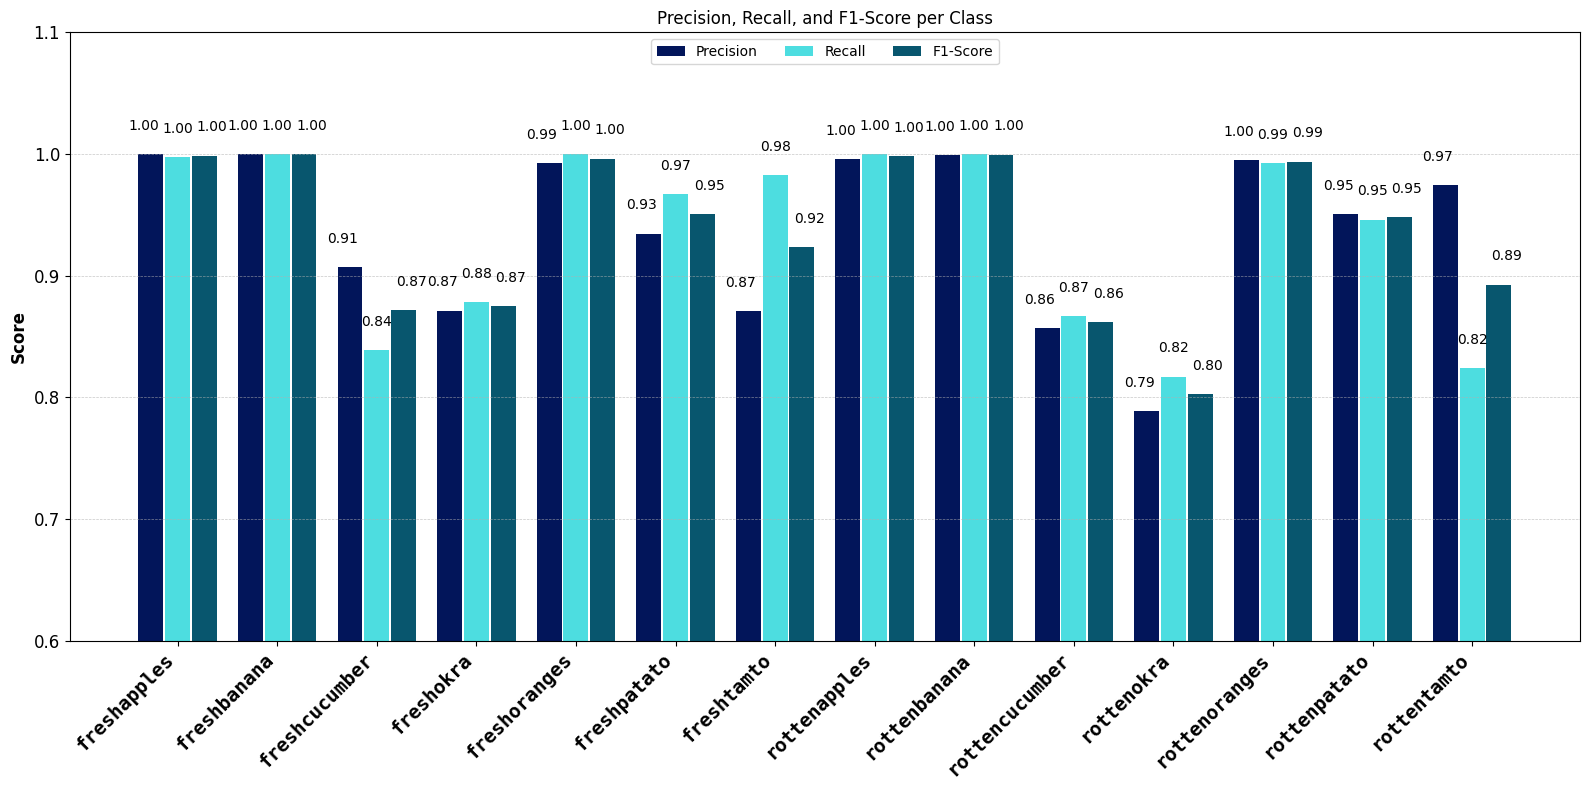

In [59]:
# --- Plot setup ---
# Set font properties
font_properties = {
    'fontsize': 14,        # Adjust size here (try 10–14)
    'fontweight': 'bold',  # Try 'normal', 'bold', or 'light'
    'fontfamily': 'monospace'  # Try 'serif', 'sans-serif', 'monospace', etc.
}
spacing_factor = 1.6           # try values >1.0 for more gap
x = np.arange(len(target_names)) * spacing_factor
x1 = np.arange(len(target_names))

width = 0.4

fig, ax = plt.subplots(figsize=(16, 8))         # wider figure

# 3 distinct colors, one for each metric
colors = ['#02155a','#4ddde0', '#08566e'] 

ax.bar(x - width - 0.03, precision, width, label='Precision', color=colors[0])
ax.bar(x ,       recall,    width, label='Recall', color=colors[1])
ax.bar(x + width + 0.03, f1,      width, label='F1-Score',  color=colors[2])

# --- Background grid lines on y-axis ---
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# --- Labels, ticks, legend ---
ax.set_xticks(x)
ax.set_xticklabels(target_names, rotation=45, ha='right',**font_properties)
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
# Customize y-axis tick labels
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim(0.6, 1.1)  # ensure space above 1.0 for annotations
ax.set_title('Precision, Recall, and F1-Score per Class')
ax.legend(loc='upper center', ncol=3)

# --- Annotate each bar with its value ---
for idx in x1:
    ax.text(idx*1.6 - width - 0.15, precision[idx] + 0.02, f"{precision[idx]:.2f}", ha='center')
    ax.text(idx*1.6,       recall[idx]    + 0.02, f"{recall[idx]:.2f}",    ha='center')
    ax.text(idx*1.6 + width + 0.15, f1[idx]       + 0.02, f"{f1[idx]:.2f}",       ha='center')

plt.tight_layout()
plt.show()


In [43]:
# Suppose you want each Precision bar to be a slightly different shade
prec_colors = plt.cm.Blues(np.linspace(0.5, 0.9, len(precision)))
rec_colors  = plt.cm.Greens(np.linspace(0.5, 0.9, len(recall)))
f1_colors   = plt.cm.Reds(np.linspace(0.5, 0.9, len(f1)))

ax.bar(x - width - 0.03, precision, width,
       label='Precision', color=prec_colors)
ax.bar(x,             recall,    width,
       label='Recall',    color=rec_colors)
ax.bar(x + width + 0.03, f1,      width,
       label='F1-Score',  color=f1_colors)


<BarContainer object of 14 artists>

# 2 more CNN layer 8 and 8 

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 126, 126, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 124, 124, 8)    │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 60, 60, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 58, 58, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 29, 29, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 27, 27, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 25, 25, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 14)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234,646 (916.59 KB)

 Trainable params: 234,646 (916.59 KB)

 Non-trainable params: 0 (0.00 B)

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 160s 225ms/step - accuracy: 0.1873 - loss: 2.2988 - val_accuracy: 0.3723 - val_loss: 1.6309
Epoch 2/30
  1/694 ━━━━━━━━━━━━━━━━━━━━ 1:34 137ms/step - accuracy: 0.3750 - loss: 1.7998

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


694/694 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.3750 - loss: 1.7998 - val_accuracy: 0.3537 - val_loss: 1.6643
Epoch 3/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 157s 226ms/step - accuracy: 0.4052 - loss: 1.5714 - val_accuracy: 0.5252 - val_loss: 1.2100
Epoch 4/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.4375 - loss: 1.2069 - val_accuracy: 0.5254 - val_loss: 1.2152
Epoch 5/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 153s 221ms/step - accuracy: 0.5459 - loss: 1.2465 - val_accuracy: 0.6061 - val_loss: 1.0537
Epoch 6/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.6875 - loss: 1.0699 - val_accuracy: 0.5997 - val_loss: 1.0512
Epoch 7/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 155s 223ms/step - accuracy: 0.5892 - loss: 1.1252 - val_accuracy: 0.5901 - val_loss: 1.0679
Epoch 8/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.5312 - loss: 0.9635 - val_accuracy: 0.5931 - val_loss: 1.0525
Epoch 9/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 154s 222ms/step - accuracy: 0.6276 - loss: 1.0182 - val

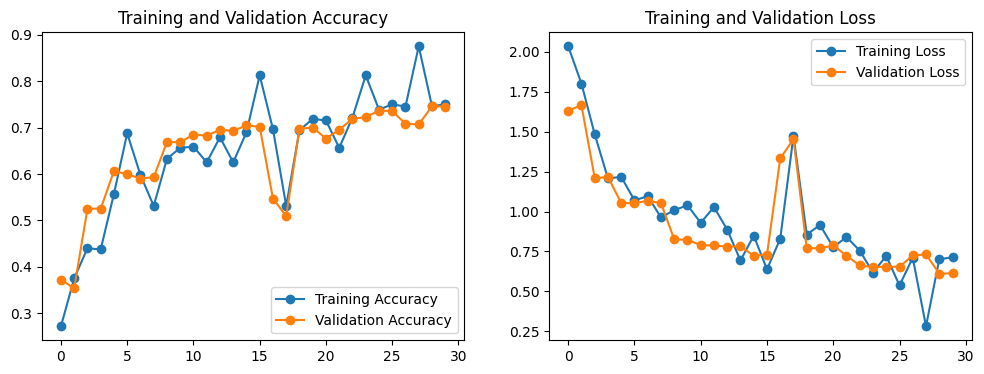

In [105]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(8, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Forth convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [106]:
model.save('saved_models/4layer-Complete_30.keras')

In [107]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1:.4f}')

248/248 ━━━━━━━━━━━━━━━━━━━━ 28s 112ms/step - accuracy: 0.7484 - loss: 0.6010
Test Accuracy: 74.52%
Test loss: 0.6141


In [108]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

Found 7927 images belonging to 14 classes.
248/248 ━━━━━━━━━━━━━━━━━━━━ 27s 110ms/step
                precision    recall  f1-score   support

   freshapples       0.95      0.91      0.93       791
   freshbanana       0.96      0.96      0.96       892
 freshcucumber       0.50      0.01      0.02       279
     freshokra       0.43      0.97      0.59       370
  freshoranges       0.83      0.96      0.89       388
   freshpatato       0.51      0.06      0.11       487
    freshtamto       0.76      0.74      0.75       679
  rottenapples       0.86      0.88      0.87       988
  rottenbanana       0.83      0.95      0.89       900
rottencucumber       0.45      0.24      0.32       255
    rottenokra       0.00      0.00      0.00       224
 rottenoranges       0.91      0.80      0.85       403
  rottenpatato       0.47      0.79      0.59       630
   rottentamto       0.67      0.71      0.69       641

      accuracy                           0.75      7927
     macro avg 

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap